100%|██████████| 758/758 [00:09<00:00, 76.28it/s] 


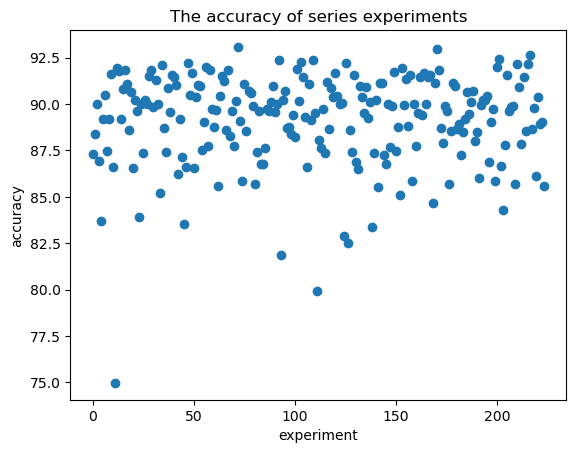

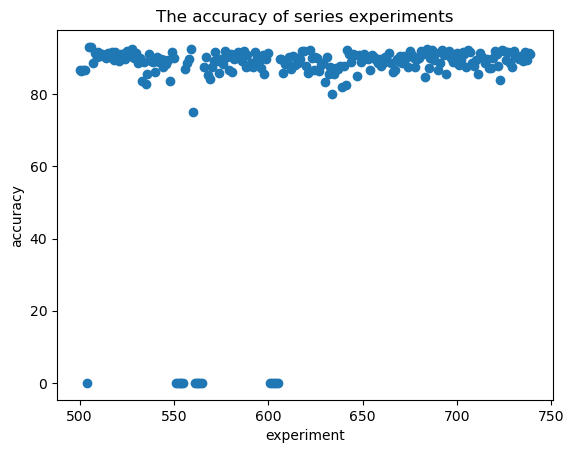

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import torch
import os
acc = np.zeros(740)
acc_cifar10 = []
acc_cifar100 = []
num_cifar10 = 0
num_cifar100 = 0

model_list = os.listdir("../config/")
for model_path in tqdm.tqdm(model_list):
    # print(model_path)
    path = os.path.join("/home/qhy/Reserach/AICAS/log",model_path.replace(".yaml",""),"best_ckpt.pth")
    if model_path not in ["repvgg.yaml","vgg.yaml","vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True.yaml",
                          "stage-1_3_4_1-ratio-1.0_0.375_0.75_0.125-op-vgg_vgg_repvgg_vgg-max-True_False_True_False.yaml",
                          "repvgg-A0-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False.yaml",
                          "benchmark-vgg11-stage-1_1_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg13-stage-2_2_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg19-stage-2_2_4_4_4-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-repvgg-a0-stage-1_2_4_14_1-ratio-0.75_0.75_0.75_0.75_2.5-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-a1-stage-1_2_4_14_1-ratio-1.0_1.0_1.0_1.0_2.5-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-a2-stage-1_2_4_14_1-ratio-1.5_1.5_1.5_1.5_2.75-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b0-stage-1_2_4_14_1-ratio-1.0_1.0_1.0_1.0_2.75-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b1-stage-1_2_4_14_1-ratio-2.0_2.0_2.0_2.0_4.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b2-stage-1_2_4_14_1-ratio-2.5_2.5_2.5_2.5_5.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b3-stage-1_2_4_14_1-ratio-3.0_3.0_3.0_3.0_5.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-a0-stage-1_2_4_14_1-ratio-0.75_0.75_0.75_0.75_2.5-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10-lr.yaml",
                          "benchmark-repvgg-a1-stage-1_2_4_14_1-ratio-1.0_1.0_1.0_1.0_2.5-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10-lr.yaml"]:

        num = int(model_path.split("-")[0])
        dataset = "cifar10"

        if os.path.exists(path) and num >= 500:
            # print(num)
            dataset = model_path.split("-")[-1].replace('.yaml','')
            if dataset == "cifar10":
                acc_cifar10.append(torch.load(path)['max_accuracy'])
                num_cifar10 += 1
            else :
                acc_cifar100.append(torch.load(path)['max_accuracy'])
                num_cifar100 += 1
            param = torch.load(path)
            acc[num] = param['max_accuracy']
            for k in param['model'].keys():
                if "pool" in k:
                    print(num)
                    break
# plt.plot(range(352,400),acc[352:400])
plt.scatter(range(num_cifar10),acc_cifar10)
plt.xlabel("experiment")
plt.ylabel("accuracy")
plt.title("The accuracy of series experiments")
# plt.savefig("./pic/50-150.png")
plt.show()

# plt.plot(range(num_cifar100),acc_cifar100)
# plt.xlabel("experiment")
# plt.ylabel("accuracy")
# plt.title("The accuracy of series experiments")
# # plt.savefig("./pic/50-150.png")
# plt.show()

plt.scatter(range(500,740),acc[500:740])
plt.xlabel("experiment")
plt.ylabel("accuracy")
plt.title("The accuracy of series experiments")
# plt.savefig("./pic/50-150.png")
plt.show()

In [3]:
acc_a = [acc[i] for i in range(500,740) if acc[i] >0]

In [4]:
len(acc_a)

224

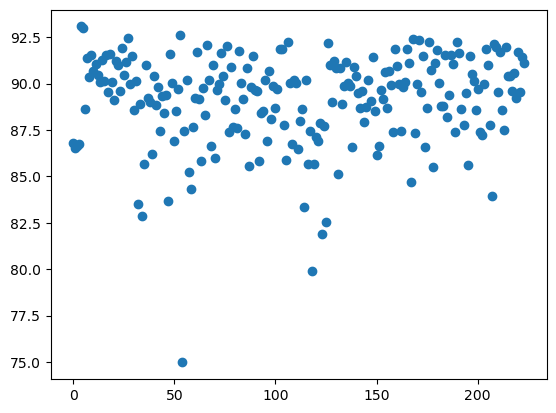

In [7]:
plt.scatter(range(224),acc_a)

In [5]:
len(acc)

740

In [3]:
max(acc[353:640])

93.08

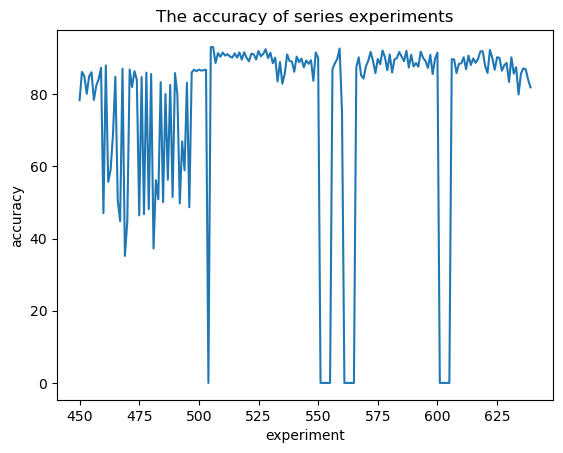

In [2]:
plt.plot(range(450,640),acc[450:640])
plt.xlabel("experiment")
plt.ylabel("accuracy")
plt.title("The accuracy of series experiments")
# plt.savefig("./pic/50-150.png")
plt.show()

In [5]:
num = 450
for i in acc[450:650]:
    if(i>91):
        print(num,i)
    num+=1

600 91.49
618 91.84
619 91.88
622 92.25
642 92.17
643 91.01
645 91.22


In [5]:
model_path  = ["benchmark-vgg11-stage-1_1_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
            "benchmark-vgg13-stage-2_2_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
            "benchmark-vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
            "benchmark-vgg19-stage-2_2_4_4_4-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml"]
for p in model_path:
    path = os.path.join("/home/qhy/Reserach/AICAS/log",p.replace(".yaml",""),"best_ckpt.pth")
    print(p.split('-')[1],torch.load(path)['max_accuracy'])


vgg11 91.23
vgg13 93.24
vgg16 92.52
vgg19 92.93


In [15]:
from thop import profile 
import yaml
from easydict import EasyDict
import sys
sys.path.append("../")
from models import model as M
import numpy as np
total_num = 640
flops_list = np.zeros(total_num)
params_list = np.zeros(total_num)
model_list = os.listdir("../config/")
for model_path in tqdm.tqdm(model_list):
    if model_path not in ["repvgg.yaml","vgg.yaml","vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True.yaml",
                          "stage-1_3_4_1-ratio-1.0_0.375_0.75_0.125-op-vgg_vgg_repvgg_vgg-max-True_False_True_False.yaml",
                          "repvgg-A0-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False.yaml",
                          "benchmark-vgg11-stage-1_1_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg13-stage-2_2_2_2_2-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg16-stage-2_2_3_3_3-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-vgg19-stage-2_2_4_4_4-ratio-1.0_1.0_1.0_1.0_1.0-op-vgg_vgg_vgg_vgg_vgg-max-False_True_True_True_True-cifar10.yaml",
                          "benchmark-repvgg-a0-stage-1_2_4_14_1-ratio-0.75_0.75_0.75_0.75_2.5-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-a1-stage-1_2_4_14_1-ratio-1.0_1.0_1.0_1.0_2.5-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-a2-stage-1_2_4_14_1-ratio-1.5_1.5_1.5_1.5_2.75-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b0-stage-1_2_4_14_1-ratio-1.0_1.0_1.0_1.0_2.75-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b1-stage-1_2_4_14_1-ratio-2.0_2.0_2.0_2.0_4.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b2-stage-1_2_4_14_1-ratio-2.5_2.5_2.5_2.5_5.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml",
                          "benchmark-repvgg-b3-stage-1_2_4_14_1-ratio-3.0_3.0_3.0_3.0_5.0-op-repvgg_repvgg_repvgg_repvgg_repvgg-max-False_False_False_False_False-cifar10.yaml"]:
        num = int(model_path.split("-")[0])
        path = os.path.join("/home/qhy/Reserach/AICAS/log",model_path)
        config = EasyDict(yaml.full_load(open(path)))
        model = M.Net(config, 10)
        input = torch.randn(1, 3, 32, 32)
        flops,params = profile(model, inputs=(input, ))
        flops_list[num] = flops/1e6
        params_list[num] = params/1e6
        # print('FLOPs = ' + str(flops/1000**2) + 'M')
        # print('Params = ' + str(params/1000**2) + 'M')

[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register count_normalization() for <class 'torch.nn.modules.batchnorm.BatchNorm2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequential'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.pooling.MaxPool2d'>.
[INFO] Register count_adap_avgpool() for <class 'torch.nn.modules.pooling.AdaptiveAvgPool2d'>.
[INFO] Register count_linear() for <class 'torch.nn.modules.linear.Linear'>.
FLOPs = 19.089024M
Params = 0.87921M


In [9]:
# !pip3 install thop

In [5]:
param["stage_0.stage_0_0_vgg.conv.weight_fake_quant.zero_point"]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0')

## Analysis the accuracy of models in Cifar100

In [149]:
p.split("-")[0]

'76'

100%|██████████| 112/112 [00:12<00:00,  9.00it/s]


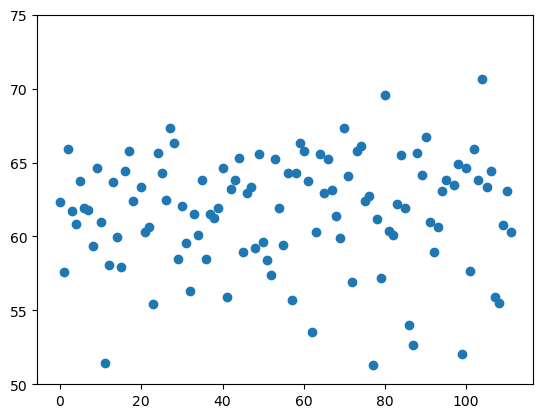

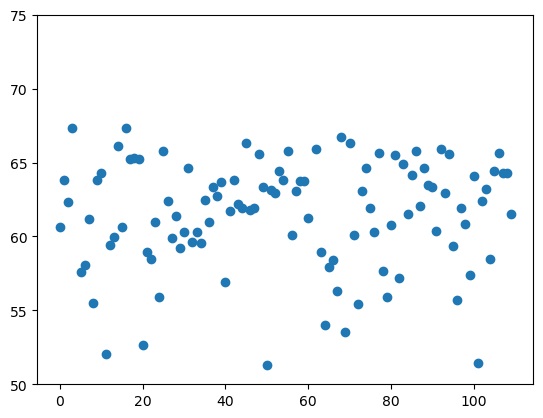

In [150]:
import os
import matplotlib.pyplot as plt
import tqdm
import torch
doc_path = "/home/qhy/Reserach/AICAS/log/cifar100"
pathlist = os.listdir(doc_path)
acc = []
acc_map = np.zeros(110)
for p in tqdm.tqdm(pathlist):
    model_path = os.path.join(doc_path,p,"best_ckpt.pth")
    model_param = torch.load(model_path)
    acc.append(model_param['max_accuracy'])
    if len(p.split("-")[0]) < 5:
        acc_map[int(p.split("-")[0])] = model_param['max_accuracy']
plt.scatter(range(len(acc)),acc)
plt.ylim(50,75)
plt.show()
plt.scatter(range(110),acc_map)
plt.ylim(50,75)
plt.show()

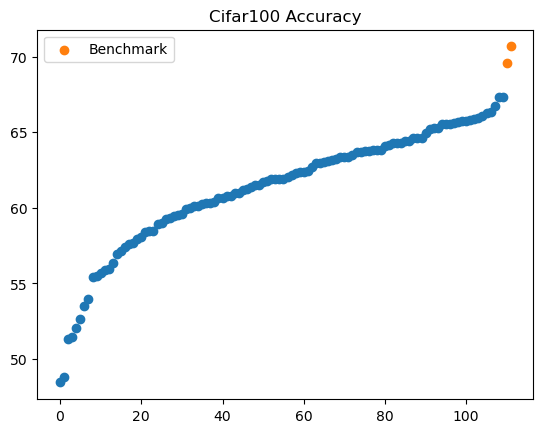

In [147]:
import numpy as np
(acc).sort()
plt.scatter(range(len(acc)-2),acc[:-2])
plt.scatter(range(len(acc)-2,len(acc)),acc[-2:],label="Benchmark")
plt.title("Cifar100 Accuracy")
plt.legend()
plt.show()

In [148]:
acc[-3]-acc[-1]

-3.3300000000000125

## Generate Coda and accint8 pair 

In [30]:
import numpy as np
# acc_8 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_8.npy",allow_pickle=True).item()
# acc_32 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_32.npy",allow_pickle=True).item()
# acc_32_510_641 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_32_510-641.npy",allow_pickle=True).item()
# acc_32_642_649 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_32_642-649.npy",allow_pickle=True).item()
# acc_32_650_739 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_32_650-739.npy",allow_pickle=True).item()
# acc_32_742 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_32_742.npy",allow_pickle=True).item()

acc_8 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_8.npy",allow_pickle=True).item()
acc_8_510_641 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_8_510-641.npy",allow_pickle=True).item()
acc_8_642_649 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_8_642-649.npy",allow_pickle=True).item()
acc_8_650_739 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_8_650-739.npy",allow_pickle=True).item()
acc_8_742 = np.load("/home/qhy/Reserach/AICAS/quantization/acc_8_742.npy",allow_pickle=True).item()


In [31]:
# l = list(acc_32.keys())
# (l).sort()
# print(l[0],l[-1])
# l = list(acc_32_650_739.keys())
# (l).sort()
# print(l[0],l[-1])
# l = list(acc_32_510_641.keys())
# (l).sort()
# print(l[0],l[-1])
# l = list(acc_32_642_649.keys())
# (l).sort()
# print(l[0],l[-1])
# l = list(acc_32_742.keys())
# (l).sort()
# print(l[0],l[-1])
l = list(acc_8.keys())
(l).sort()
print(l[0],l[-1])
l = list(acc_8_650_739.keys())
(l).sort()
print(l[0],l[-1])
l = list(acc_8_510_641.keys())
(l).sort()
print(l[0],l[-1])
l = list(acc_8_642_649.keys())
(l).sort()
print(l[0],l[-1])
l = list(acc_8_742.keys())
(l).sort()
print(l[0],l[-1])

743 898
650 739
510 641
642 649
743 989


In [32]:
acc_8_new_dict = dict()
for dic in (acc_8_510_641,acc_8_642_649,acc_8_650_739,acc_8_742):
    for k in dic.keys():
        acc_8_new_dict[k] = dic[k]

In [33]:
np.save("/home/qhy/Reserach/AICAS/quantization/acc_8_510-989.npy",acc_8_new_dict)

In [35]:
data = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/data-dict-980.npy",allow_pickle=True).item()

In [41]:
l_1 = list(data.keys())
(l_1).sort


<function list.sort(*, key=None, reverse=False)>

In [42]:
l_2 = list(acc_8_new_dict.keys())
(l_2).sort

<function list.sort(*, key=None, reverse=False)>

In [43]:
for i in l_1:
    if i not in l_2:
        print(i)

740
741


In [46]:
data.pop(740)
data.pop(741)

88.5

In [50]:
for k in data.keys():
    data[k]['acc_8'] = acc_8_new_dict[k]

In [52]:
data[520].keys()

dict_keys(['code', 'acc', 'acc_8'])

In [53]:
np.save("/home/qhy/Reserach/AICAS/predictor/dataset/data-dict-980-int8.npy",data)

In [60]:
acc_32 = []
acc_8 = []
code = []
for k in data.keys():
    acc_32.append(data[k]['acc'])
    acc_8.append(data[k]['acc_8'])
    code.append(np.array(data[k]['code'])*np.array([8]*5+[1]*16))
np.save("/home/qhy/Reserach/AICAS/predictor/dataset/acc_32_510-989.npy",np.array(acc_32))
np.save("/home/qhy/Reserach/AICAS/predictor/dataset/acc_8_510-989.npy",np.array(acc_8))
np.save("/home/qhy/Reserach/AICAS/predictor/dataset/code_510-989.npy",np.array(code))

    
    

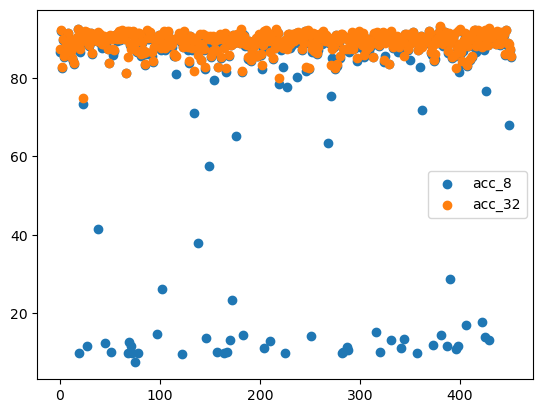

In [57]:
plt.scatter(range(len(acc_8)),acc_8,label="acc_8")
plt.scatter(range(len(acc_32)),acc_32,label="acc_32")
plt.legend()
plt.show()


In [61]:
code[0]

array([7., 7., 4., 1., 2., 0., 0., 0., 1., 0., 2., 2., 1., 2., 2., 2., 1.,
       1., 1., 8., 1.])

In [62]:
len(code)

452

In [13]:
acc_32 = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/acc_32_510-989.npy")


In [15]:
acc_32.sort()

In [17]:
acc_32.shape[0]

452

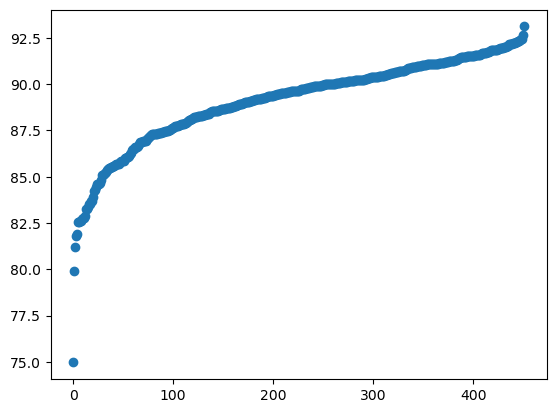

In [18]:
import matplotlib.pyplot as plt
plt.scatter(range(acc_32.shape[0]),acc_32)

## Analysis of relatrionship between accuracy and other variables

In [111]:
import pandas as pd
df = pd.read_table("../test.md",delimiter='|')

In [112]:
df.drop(columns='Unnamed: 0',inplace=True) 
df.drop(columns='Unnamed: 11',inplace=True) 
df.drop(labels=[0,1],inplace=True)
df=df.reset_index(drop=True)


In [131]:
for i in range(338):
    if float(df["flops"][i])>1000:
        df["flops"][i] = float(df["flops"][i])/1e6
        df["params"][i] = float(df["params"][i])/1e6
    else:
        df["flops"][i] = float(df["flops"][i])
        df["params"][i] = float(df["params"][i])
    

In [30]:
import numpy as np
data = np.load("/home/qhy/Reserach/AICAS/predictor/dataset/data-dict-980.npy",allow_pickle=True).item()

In [82]:
data[650]['acc']

89.88

In [115]:
for i in range(338):
    if int(df.iloc[i]["NO."]) in data.keys():
        df.iloc[i]["Acc"] = data[int(df.iloc[i]["NO."])]['acc']

In [116]:
df.sort_values("Acc",ascending=False,inplace=True)

In [118]:
df=df.reset_index(drop=True)

In [173]:
for row in range(df.shape[0]):
    layers = np.array([int(i) for i in df["layer"][row].split('-')])
    width = np.array([float(i) for i in df["ratio"][row].split('-')])*np.array([64,64,128,256,512])
    area = layers*width
    df.loc[row,"total layer"] = layers.sum()
    df.loc[row,"total width"] = width.sum()
    df.loc[row,"area"] = area.sum()
    

In [164]:
(np.array([float(i) for i in df["ratio"][0].split('-')])*np.array([64,64,128,256,512])).sum()

496.0

In [171]:
df["area"] = df["total layer"]*df["total width"]

Text(0.5, 0, 'flops/M')

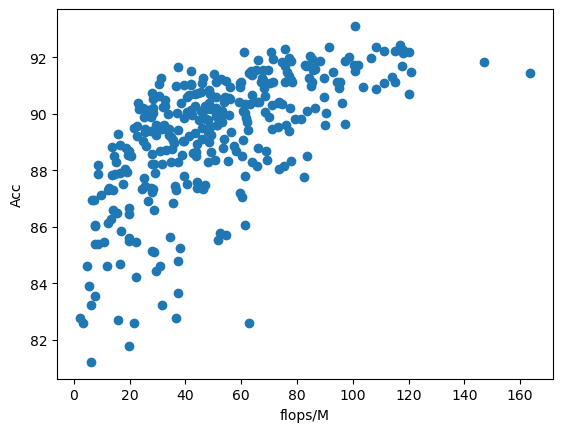

In [145]:
import matplotlib.pyplot as plt

plt.scatter((df["flops"][0:328]),(df["Acc"][0:328]))
plt.ylabel("Acc")
plt.xlabel("flops/M")


Text(0.5, 0, 'params/M')

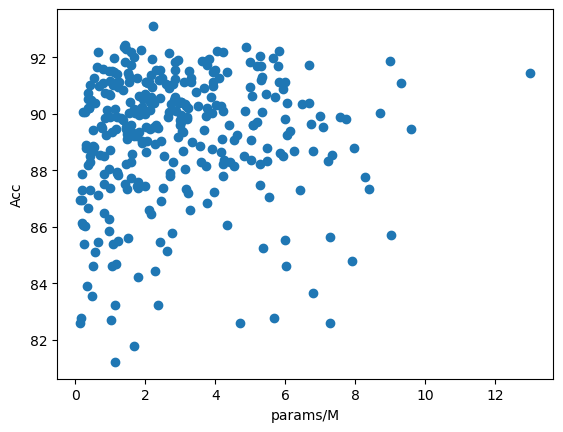

In [144]:
plt.scatter((df["params"][0:328]),(df["Acc"][0:328]))
plt.ylabel("Acc")
plt.xlabel("params/M")


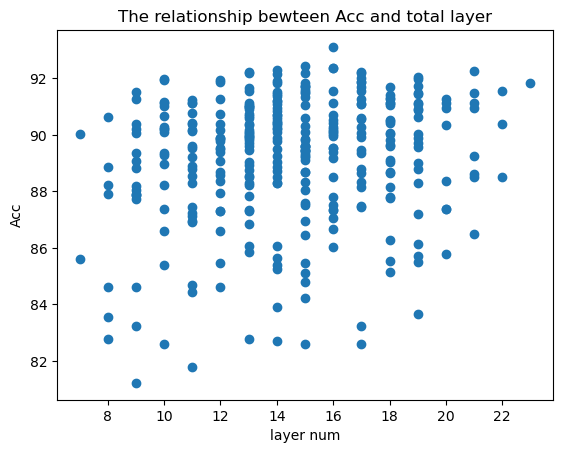

In [169]:
plt.scatter((df["total layer"][0:328]),(df["Acc"][0:328]))
plt.ylabel("Acc")
plt.xlabel("layer num")
plt.title("The relationship bewteen Acc and total layer")
plt.show()

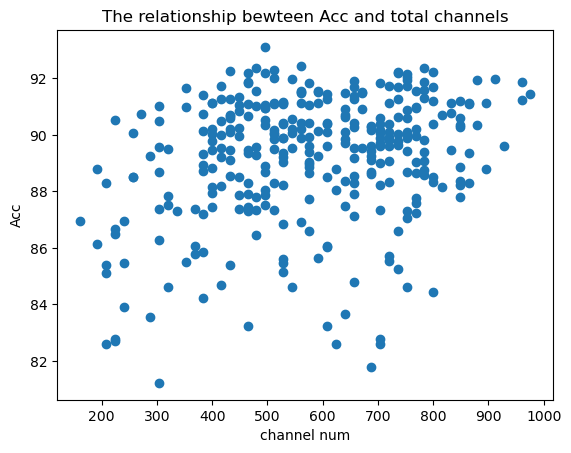

In [170]:
plt.scatter((df["total width"][0:328]),(df["Acc"][0:328]))
plt.ylabel("Acc")
plt.xlabel("channel num")
plt.title("The relationship bewteen Acc and total channels")
plt.show()


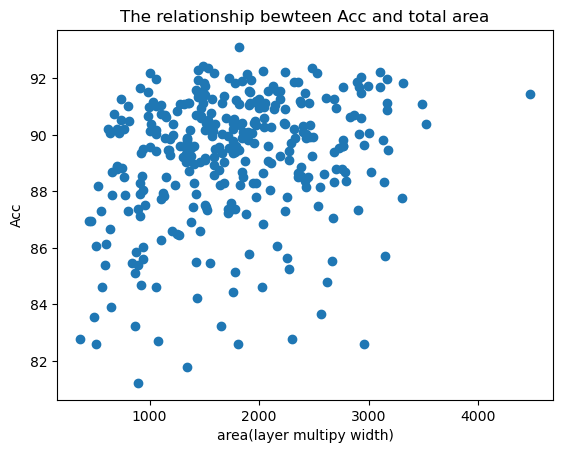

In [174]:
plt.scatter((df["area"][0:328]),(df["Acc"][0:328]))
plt.ylabel("Acc")
plt.xlabel("area(layer multipy width)")
plt.title("The relationship bewteen Acc and total area")
plt.show()


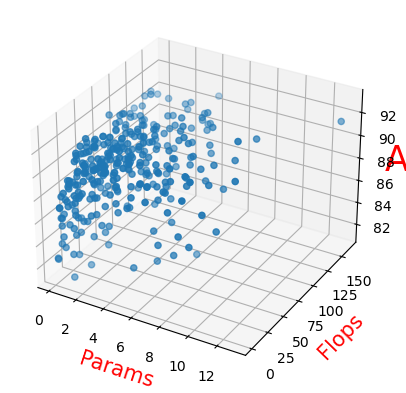

In [143]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
# 绘制散点图
fig = plt.figure()
# ax = Axes3D(fig)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["params"][0:328], df["flops"][0:328], df["Acc"][0:328])
 
 
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Acc', fontdict={'size': 25, 'color': 'red'})
ax.set_ylabel('Flops', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('Params', fontdict={'size': 15, 'color': 'red'})
plt.savefig("./test.png")
plt.show()
